In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import sys, os
import seaborn as sns
sys.path.insert(0, os.path.abspath('/home/qdeng/Github/cvxbook_additional_exercises/python'))

In [2]:
from ot_midpoint_data import *

<Axes: >

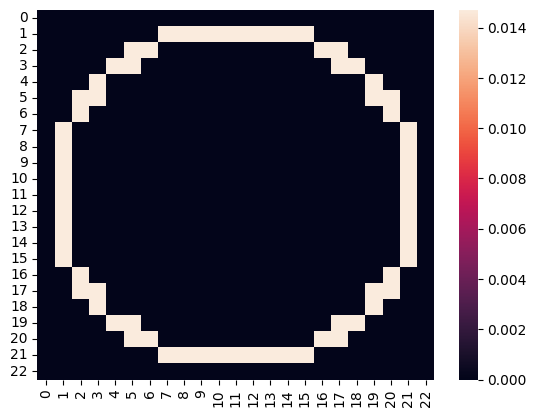

In [3]:
sns.heatmap(np.reshape(p,(23, 23)))

<Axes: >

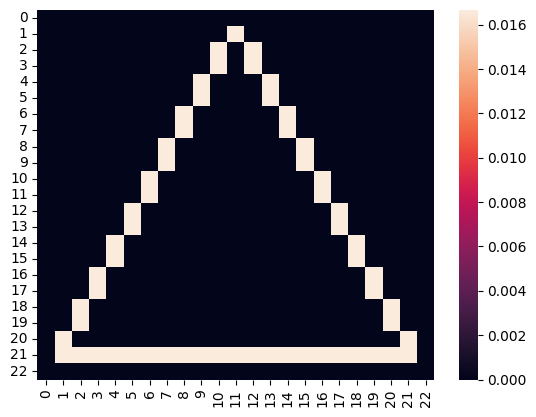

In [4]:
sns.heatmap(np.reshape(q,(23, 23)))

In [5]:
C.shape

(529, 529)

In [ ]:
np.sum(p)

In [ ]:
np.sum(q)

In [ ]:
X.as

In [14]:
c = cp.Variable(n)
X1 = cp.Variable((n,n))
X2 = cp.Variable((n,n))

obj = cp.sum(cp.multiply(C, X1+X2))

constraints = ([
    cp.sum(X1, axis=0)==p,
    cp.sum(X1, axis=0)==c,
    cp.sum(X2, axis=0)==c,
    cp.sum(X2, axis=0)==q,
    cp.sum(c)==1,
    X1>=0, X2>=0, c>=0
])

cp.Problem(cp.Minimize(obj), constraints).solve()
# constraints

OverflowError: Python integer 315022893536 out of bounds for int32

In [11]:
X = cp.Variable(C.shape)
X_ = cp.Variable(C.shape)
y = cp.Variable(n)

# obj = cp.Minimize(
#     cp.trace(C.T@X)
#     +cp.trace(C.T@X_)
# )

obj = cp.Minimize(
    cp.sum(cp.multiply(C, X+X_))
)

constraints = []
constraints += [cp.sum(X, axis=1)==y]#[X@np.ones(p.shape)==y]
constraints += [cp.sum(X, axis=0)==p]#[X.T@np.ones(p.shape)==p]
constraints += [X>=0]

constraints += [cp.sum(X_, axis=1)==q]#[X_@np.ones(p.shape)==q]
constraints += [cp.sum(X_, axis=0)==y]#[X_.T@np.ones(p.shape)==y]
constraints += [X_>=0]

constraints += [y >= 0]
constraints += [cp.sum(y) == 1]

prob = cp.Problem(obj, constraints)

prob.solve()

OverflowError: Python integer 315022893536 out of bounds for int32

In [36]:
X_@np.ones(p.shape)

Expression(AFFINE, UNKNOWN, (np.int32(529),))

In [37]:
X_

Variable((np.int32(529), np.int32(529)), var594)

In [ ]:
constraints

In [49]:
np.sum([[1,2],[3,4]],axis=1)

array([3, 7])

In [51]:
n

529

In [8]:
p.shape

(529,)